# **View a specific instance and test correctness of features**

In [1]:
###############################################################################
# Import packages
###############################################################################
import os
import time
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from scipy.spatial.distance import cdist
import gurobipy as gp
from gurobipy import GRB
from scipy.stats import skew
import math
import itertools
from sklearn.cluster import DBSCAN

# Load functions
from helperfunctions_data_generation import distance, fun_load_file, solve_tsp, plot_tsp, fun_cluster_features

In [2]:
# Load data
df_final = fun_load_file(subfolder_path='..\\..\\01_data\\01_TSP', name='tsp_instances_j_updated.xlsx')
df_final = df_final[df_final.columns[1:]]
df_final

,Instance ID,Number Customers,X,Y,X Depot,Y Depot,Depot Distance,Closest Customer Distance (CCD),2nd CCD,3rd CCD,...,Centroid Distance To Depot Ratio,Distance To Closest Other Cluster Ratio,Distance To Closest Other Centroid Ratio,Cluster Area Ratio,Cluster Density Ratio,Savings Ratio,Marginal Costs Ratio,Shapley Value,SHAPO,Percentage Error
0,1,6,11.757432,50.848731,2.380844,66.016752,17.832253,29.874328,36.418450,42.990573,...,0.885295,1.199919,1.199889,1.199907,0.011512,0.022796,0.021584,6.805996,6.847093,0.006038
1,1,6,83.228495,41.537025,2.380844,66.016752,84.472480,33.588825,42.487567,51.532130,...,1.573524,0.000403,0.000554,0.000465,5.942439,2.161204,2.365312,73.361446,72.126416,0.016835
2,1,6,33.032921,29.876631,2.380844,66.016752,47.388376,9.140981,29.874328,32.182303,...,0.885295,1.199919,1.199889,1.199907,0.011512,0.186036,0.176144,21.568006,21.751330,0.008500
3,1,6,42.131509,30.755973,2.380844,66.016752,53.136032,9.140981,30.003533,30.228067,...,0.885295,1.199919,1.199889,1.199907,0.011512,0.514850,0.487476,25.980268,26.403603,0.016294
4,1,6,54.103013,58.267699,2.380844,66.016752,52.299433,30.003533,33.588825,35.355360,...,0.885295,1.199919,1.199889,1.199907,0.011512,0.101425,0.096032,30.191952,30.346193,0.005109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,9000,14,35.411268,13.512220,83.308855,83.076767,84.459488,7.012024,18.513792,29.590372,...,1.010867,1.166573,1.166526,1.166634,0.013872,0.368519,0.305413,32.946966,33.551630,0.018353
89996,9000,14,94.027698,4.059342,83.308855,83.076767,79.741125,42.666686,56.598097,58.952004,...,1.523562,0.000498,0.000877,0.000195,6.916770,4.429439,3.670935,70.014213,69.654750,0.005134
89997,9000,14,15.703090,62.406463,83.308855,83.076767,70.695127,23.369701,24.005740,25.154440,...,1.010867,1.166573,1.166526,1.166634,0.013872,2.593953,2.536474,37.349798,42.540654,0.138979
89998,9000,14,46.611090,57.482706,83.308855,83.076767,44.741277,16.222253,17.116747,18.088289,...,1.010867,1.166573,1.166526,1.166634,0.013872,0.163084,1.034829,16.911138,12.089902,0.285092


**Extract necessary information out of the tsp instance**

In [95]:
# Define instance id and get the data frame of the instance
instance_id = 8501
tsp_instance = df_final[df_final['Instance ID'] == instance_id]
tsp_instance.index = np.arange(start=1, stop=len(tsp_instance)+1)

# Get instance coordinates and cluster assignments
coord = [(tsp_instance.iloc[0]['X Depot'], tsp_instance.iloc[0]['Y Depot'])] + [(tsp_instance.iloc[i]['X'], tsp_instance.iloc[i]['Y']) for i in range(len(tsp_instance))]
assignments = tsp_instance['Cluster']

# Get indices of core points
core_points_mask = np.zeros_like(assignments, dtype=bool) # Create list with same length as assignments containing only zero/False values
core_point_indices = np.where(tsp_instance['Core Point'] == True)[0]

# Solve TSP
sequence, total_costs = solve_tsp(coord)

**Distance features**

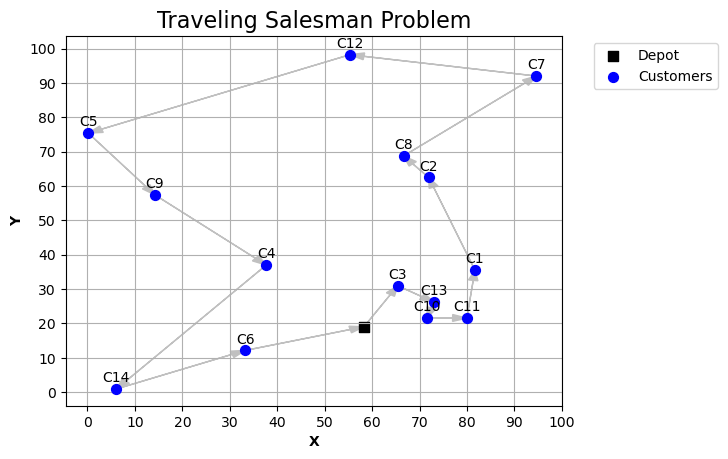

,Instance ID,Number Customers,X,Y,X Depot,Y Depot,Depot Distance,Closest Customer Distance (CCD),2nd CCD,3rd CCD,4th CCD,Mean Distance To Other Customers,Gravity Center Distance
1,8501,14,81.667559,35.528101,58.268,19.04008,28.625062,12.692656,14.070423,16.902492,17.120237,45.724826,29.791720
2,8501,14,71.932706,62.487468,58.268,19.04008,45.545578,8.219237,28.663127,32.166027,36.304716,45.512272,24.768166
3,8501,14,65.384259,30.995069,58.268,19.04008,13.912689,9.050037,11.186627,16.902492,17.364379,40.665217,18.826938
4,8501,14,37.673664,37.006325,58.268,19.04008,27.329702,25.235082,28.355110,31.122459,36.999257,44.468419,18.237232
5,8501,14,0.171087,75.397480,58.268,19.04008,80.940768,22.787460,53.668651,59.668461,66.773287,73.918537,61.178269
6,8501,14,33.254116,12.161266,58.268,19.04008,25.942484,25.235082,29.364767,37.243231,39.502213,54.935799,39.307020
7,8501,14,94.627793,92.010319,58.268,19.04008,81.527237,36.410670,37.237961,39.815553,57.950053,72.663057,61.783584
8,8501,14,66.612956,68.752938,58.268,19.04008,50.408397,8.219237,31.568730,36.410670,36.476443,46.905880,26.394306
9,8501,14,14.197038,57.438052,58.268,19.04008,58.452151,22.787460,31.122459,49.123921,53.623270,58.065217,41.180363
10,8501,14,71.590383,21.687833,58.268,19.04008,13.582948,4.745617,8.373132,11.186627,17.120237,44.937265,29.989600


Depot distances:


{'Customer 1': 28.62506233167605,
 'Customer 2': 45.54557785890905,
 'Customer 3': 13.912688673759918,
 'Customer 4': 27.329701968313643,
 'Customer 5': 80.9407675700441,
 'Customer 6': 25.942483887355454,
 'Customer 7': 81.52723650982642,
 'Customer 8': 50.40839676662175,
 'Customer 9': 58.45215115014573,
 'Customer 10': 13.582948080563968,
 'Customer 11': 21.840576520581838,
 'Customer 12': 79.2406009390432,
 'Customer 13': 16.433603442554656,
 'Customer 14': 55.20269033012492}

CLOSEST CUSTOMER DISTANCES:
- Customer 1: [12.69265637 14.07042272 16.90249211 17.12023655]; Mean: 45.7248259462165
- Customer 2: [ 8.21923704 28.66312664 32.16602728 36.30471623]; Mean: 45.51227235233435
- Customer 3: [ 9.05003707 11.18662694 16.90249211 17.36437928]; Mean: 40.665216959488966
- Customer 4: [25.23508198 28.35510994 31.12245942 36.9992567 ]; Mean: 44.46841917462388
- Customer 5: [22.78746045 53.66865128 59.66846141 66.77328673]; Mean: 73.91853704830186
- Customer 6: [25.23508198 29.36476724 37.24323072 39.50221284]; Mean: 54.935799121118265
- Customer 7: [36.41067042 37.23796091 39.81555287 57.95005283]; Mean: 72.66305730152398
- Customer 8: [ 8.21923704 31.56872983 36.41067042 36.47644265]; Mean: 46.90588032826344
- Customer 9: [22.78746045 31.12245942 49.12392136 53.62326982]; Mean: 58.06521736216504
- Customer 10: [ 4.74561727  8.37313196 11.18662694 17.12023655]; Mean: 44.93726499552244
- Customer 11: [ 8.31674873  8.37313196 14.07042272 17.36437928]; Mean: 48.60569

,Customer 1,Customer 2,Customer 3,Customer 4,Customer 5,Customer 6,Customer 7,Customer 8,Customer 9,Customer 10,Customer 11,Customer 12,Customer 13,Customer 14,Mean,Gravity Center Distance
Customer 1,0.000000,28.663127,16.902492,44.018723,90.726195,53.757515,57.950053,36.476443,70.938827,17.120237,14.070423,68.015782,12.692656,83.090265,45.724826,29.791720
Customer 2,28.663127,0.000000,32.166027,42.696260,72.913636,63.472513,37.237961,8.219237,57.956052,40.801071,41.706410,39.418469,36.304716,90.104061,45.512272,24.768166
Customer 3,16.902492,32.166027,0.000000,28.355110,78.894435,37.243231,67.661252,37.777855,57.613913,11.186627,17.364379,67.982074,9.050037,66.450389,40.665217,18.826938
Customer 4,44.018723,42.696260,28.355110,0.000000,53.668651,25.235082,79.178357,42.957305,31.122459,37.215588,45.021079,63.705838,36.999257,47.915742,44.468419,18.237232
Customer 5,90.726195,72.913636,78.894435,53.668651,0.000000,71.367399,95.906495,66.773287,22.787460,89.361301,96.254905,59.668461,87.938171,74.680585,73.918537,61.178269
Customer 6,53.757515,63.472513,37.243231,25.235082,71.367399,0.000000,100.710474,65.691929,49.123921,39.502213,47.644942,88.842635,42.208767,29.364767,54.935799,39.307020
Customer 7,57.950053,37.237961,67.661252,79.178357,95.906495,100.710474,0.000000,36.410670,87.546262,73.999826,71.959186,39.815553,69.254217,126.989439,72.663057,61.783584
Customer 8,36.476443,8.219237,37.777855,42.957305,66.773287,65.691929,36.410670,0.000000,53.623270,47.327570,49.043416,31.568730,43.038265,90.868470,46.905880,26.394306
Customer 9,70.938827,57.956052,57.613913,31.122459,22.787460,49.123921,87.546262,53.623270,0.000000,67.617115,74.914890,57.905588,66.637955,57.060112,58.065217,41.180363
Customer 10,17.120237,40.801071,11.186627,37.215588,89.361301,39.502213,73.999826,47.327570,67.617115,0.000000,8.373132,78.251642,4.745617,68.682507,44.937265,29.989600


In [96]:
# Get column names
instance_features = ['Instance ID', 'Number Customers', 'X', 'Y', 'X Depot', 'Y Depot']
distance_features = ['Depot Distance', 'Closest Customer Distance (CCD)', '2nd CCD', '3rd CCD', '4th CCD', 'Mean Distance To Other Customers', 'Gravity Center Distance']

# Define the range for X and Y coordinates and view instance with optimal tour as well as the data frame
x_range = (0, 100)
y_range = (0, 100)
plot_tsp(coord=coord, sequence=sequence, total_costs=total_costs, x_range=x_range, y_range=y_range, 
         assignments=None, core_point_indices=None, plot_sequence=True)
display(tsp_instance[instance_features + distance_features])

# Depot distances
num_customers = len(tsp_instance)
print('Depot distances:')
display({'Customer ' + str(i): distance(coord1=coord[0], coord2=coord[i]) for i in range(1, num_customers+1)})

# Customer distance matrix and mean distance
labels = ['Customer ' + str(i) for i in range(1, num_customers+1)]
distance_matrix = pd.DataFrame(cdist(tsp_instance[['X', 'Y']], tsp_instance[['X', 'Y']], metric='euclidean'), index=labels, columns=labels)
for index in range(len(distance_matrix)):
    if (index == 0): print('CLOSEST CUSTOMER DISTANCES:')
    print('- Customer {}: {}; Mean: {}'.format(index+1, np.sort(distance_matrix.iloc[index])[1:5], np.mean(np.sort(distance_matrix.iloc[index])[1:])))
distance_matrix['Mean'] = np.sum(distance_matrix, axis=1) / (num_customers - 1)

# Add gravity center
gravity_center = list(np.mean(tsp_instance[['X', 'Y']], axis=0))
print('\nGravity Center:', gravity_center)
gravity_center_distances = [distance(coord1=gravity_center, coord2=list(tsp_instance.iloc[customer][['X', 'Y']])) for customer in range(num_customers)]
distance_matrix['Gravity Center Distance'] = gravity_center_distances

print('\nCUSTOMER DISTANCE MATRIX:'); display(distance_matrix)

**Cluster features**

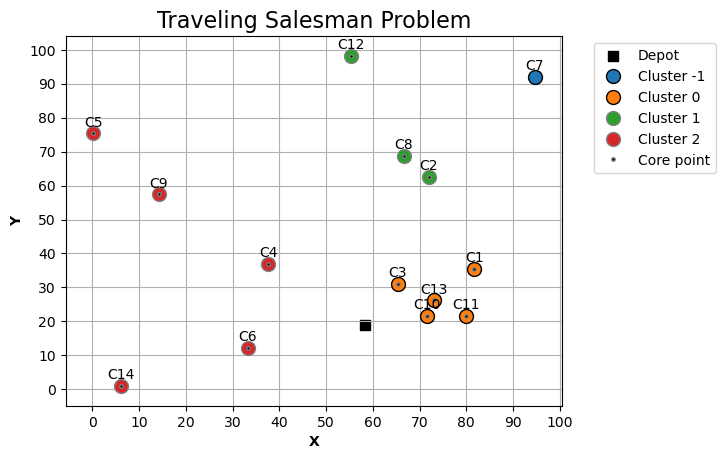

,X,Y,Depot Distance,Cluster,Core Point,Outlier,Number Clusters,Number Outliers,Cluster Size,X Centroid,Y Centroid,Centroid Distance,Centroid Distance To Depot,Distance To Closest Other Cluster,Distance To Closest Other Centroid,Cluster Area,Cluster Density
1,81.667559,35.528101,28.625062,0,1,0,3,1,5,74.332898,27.194523,11.101611,18.015990,28.663127,44.368158,208.245075,0.024010
2,71.932706,62.487468,45.545578,1,1,0,3,1,3,64.615307,76.488497,15.797885,57.798001,28.663127,35.374466,1003.092832,0.002991
3,65.384259,30.995069,13.912689,0,1,0,3,1,5,74.332898,27.194523,9.722258,18.015990,28.355110,45.499926,208.245075,0.024010
4,37.673664,37.006325,27.329702,2,1,0,3,1,5,18.281643,36.591344,19.396461,43.668703,28.355110,37.949584,4352.591524,0.001149
5,0.171087,75.397480,80.940768,2,1,0,3,1,5,18.281643,36.591344,42.824157,43.668703,59.668461,64.453454,4352.591524,0.001149
6,33.254116,12.161266,25.942484,2,1,0,3,1,5,18.281643,36.591344,28.653162,43.668703,37.243231,43.743173,4352.591524,0.001149
7,94.627793,92.010319,81.527237,-1,0,1,3,1,1,94.627793,92.010319,0.000000,81.527237,36.410670,33.788700,1.000000,1.000000
8,66.612956,68.752938,50.408397,1,1,0,3,1,3,64.615307,76.488497,7.989336,57.798001,36.476443,42.269366,1003.092832,0.002991
9,14.197038,57.438052,58.452151,2,1,0,3,1,5,18.281643,36.591344,21.243099,43.668703,53.623270,53.897322,4352.591524,0.001149
10,71.590383,21.687833,13.582948,0,1,0,3,1,5,74.332898,27.194523,6.151831,18.015990,37.215588,55.242778,208.245075,0.024010


Cluster -1: Customer 7
    - Centroid {'X': 94.62779326294437, 'Y': 92.01031886308306}
    - Customer distances to centorid: 0.0
    - Centroid distance to depot: 81.52723650982642
Cluster 0 with Customers: [1, 3, 10, 11, 13]
    - Centroid {'X': 74.3328983798539, 'Y': 27.194522939404568}
    - Customer distances to centorid: [11.101611142065329, 9.722257863852212, 6.151831163637157, 7.964017844659369, 1.615405763840654]
    - Centroid distance to depot: 18.01598996694033
    - Distance of other cluster customers to centroid: {'Customer 2': 35.374466341934465, 'Customer 4': 37.949583717122124, 'Customer 5': 88.4505475285615, 'Customer 6': 43.743172749628314, 'Customer 7': 67.9188498101641, 'Customer 8': 42.269366447053514, 'Customer 9': 67.31264960642702, 'Customer 12': 73.53626598719696, 'Customer 14': 73.09333109765952}
Cluster 1 with Customers: [2, 8, 12]
    - Centroid {'X': 64.61530702799611, 'Y': 76.48849749143459}
    - Customer distances to centorid: [15.797884797949306, 7.9893

,Customer 1,Customer 2,Customer 3,Customer 4,Customer 5,Customer 6,Customer 7,Customer 8,Customer 9,Customer 10,Customer 11,Customer 12,Customer 13,Customer 14,Mean,Gravity Center Distance
Customer 1,0.000000,28.663127,16.902492,44.018723,90.726195,53.757515,57.950053,36.476443,70.938827,17.120237,14.070423,68.015782,12.692656,83.090265,45.724826,29.791720
Customer 2,28.663127,0.000000,32.166027,42.696260,72.913636,63.472513,37.237961,8.219237,57.956052,40.801071,41.706410,39.418469,36.304716,90.104061,45.512272,24.768166
Customer 3,16.902492,32.166027,0.000000,28.355110,78.894435,37.243231,67.661252,37.777855,57.613913,11.186627,17.364379,67.982074,9.050037,66.450389,40.665217,18.826938
Customer 4,44.018723,42.696260,28.355110,0.000000,53.668651,25.235082,79.178357,42.957305,31.122459,37.215588,45.021079,63.705838,36.999257,47.915742,44.468419,18.237232
Customer 5,90.726195,72.913636,78.894435,53.668651,0.000000,71.367399,95.906495,66.773287,22.787460,89.361301,96.254905,59.668461,87.938171,74.680585,73.918537,61.178269
Customer 6,53.757515,63.472513,37.243231,25.235082,71.367399,0.000000,100.710474,65.691929,49.123921,39.502213,47.644942,88.842635,42.208767,29.364767,54.935799,39.307020
Customer 7,57.950053,37.237961,67.661252,79.178357,95.906495,100.710474,0.000000,36.410670,87.546262,73.999826,71.959186,39.815553,69.254217,126.989439,72.663057,61.783584
Customer 8,36.476443,8.219237,37.777855,42.957305,66.773287,65.691929,36.410670,0.000000,53.623270,47.327570,49.043416,31.568730,43.038265,90.868470,46.905880,26.394306
Customer 9,70.938827,57.956052,57.613913,31.122459,22.787460,49.123921,87.546262,53.623270,0.000000,67.617115,74.914890,57.905588,66.637955,57.060112,58.065217,41.180363
Customer 10,17.120237,40.801071,11.186627,37.215588,89.361301,39.502213,73.999826,47.327570,67.617115,0.000000,8.373132,78.251642,4.745617,68.682507,44.937265,29.989600


In [97]:
# Get column names
cluster_features = ['Cluster', 'Core Point', 'Outlier', 'Number Clusters', 'Number Outliers', 'Cluster Size', 'X Centroid', 'Y Centroid', 'Centroid Distance', 
                    'Centroid Distance To Depot', 'Distance To Closest Other Cluster', 'Distance To Closest Other Centroid', 'Cluster Area', 'Cluster Density']

# View instance as well as the data frame
plot_tsp(coord=coord, sequence=None, total_costs=None, x_range=x_range, y_range=y_range, 
         assignments=assignments, core_point_indices=core_point_indices, plot_sequence=False)
display(tsp_instance[['X', 'Y', 'Depot Distance'] + cluster_features])

# Recompute cluster features
for cluster in np.unique(tsp_instance['Cluster']):
    if (cluster == -1):
        # Compute feature for each outlier individually
        for outlier in tsp_instance[tsp_instance['Cluster'] == -1].index:
            cluster_data = centroid = list(tsp_instance.loc[outlier][['X', 'Y']])
            centroid_distances = distance(coord1=centroid, coord2=cluster_data)
            centroid_depot_distance = distance(coord1=centroid, coord2=coord[0])
            not_cluster_data = tsp_instance[tsp_instance['Cluster'] != cluster][['X', 'Y']]
            other_customers_centroid_distances = [distance(coord1=centroid, coord2=list(not_cluster_data.iloc[customer])) for customer in range(len(not_cluster_data))]

            # Print results
            print('Cluster {}: Customer {}\n    - Centroid {}'.format(int(cluster), outlier, {'X': centroid[0], 'Y': centroid[1]}))
            print('    - Customer distances to centorid: {}\n    - Centroid distance to depot: {}'.format(centroid_distances, centroid_depot_distance))
            #print('    - Distance of other cluster customers to centroid:', other_customers_centroid_distances)
    
    else: # Compute features for all other clusters
        cluster_data = tsp_instance[tsp_instance['Cluster'] == cluster][['X', 'Y']]
        centroid = list(np.mean(cluster_data, axis=0))
        centroid_distances = [distance(coord1=centroid, coord2=list(cluster_data.iloc[customer])) for customer in range(len(cluster_data))]
        centroid_depot_distance = distance(coord1=centroid, coord2=coord[0])
        not_cluster_data = tsp_instance[tsp_instance['Cluster'] != cluster][['X', 'Y']]
        other_customers_centroid_distances = [distance(coord1=centroid, coord2=list(not_cluster_data.iloc[customer])) for customer in range(len(not_cluster_data))]

        # Print results
        print('Cluster {} with Customers: {}\n    - Centroid {}'.format(int(cluster), [i for i in cluster_data.index], {'X': centroid[0], 'Y': centroid[1]}))
        print('    - Customer distances to centorid: {}\n    - Centroid distance to depot: {}'.format(centroid_distances, centroid_depot_distance))
        print('    - Distance of other cluster customers to centroid:', {'Customer ' + str(not_cluster_data.index[i]): other_customers_centroid_distances[i] for i in range(len(not_cluster_data))})

print('\nCUSTOMER DISTANCE MATRIX:'); display(distance_matrix)

In [98]:
x_depot = tsp_instance.iloc[0]['X Depot'] # X coordinate of depot
y_depot = tsp_instance.iloc[0]['Y Depot'] # Y coordinate of depot
df_depot = pd.DataFrame(data={'Instance ID': instance_id, 'Number Customers': num_customers, 
                                'X': x_depot, 'Y': y_depot}, index=[0])
tsp_instance = pd.concat([df_depot, tsp_instance], ignore_index=True)

tsp_instance = fun_cluster_features(data=tsp_instance, assignments=assignments, core_point_indices=core_point_indices, 
                                    features=instance_features+cluster_features, prints=True)
tsp_instance = tsp_instance.iloc[1:]

  - Cluster: 0
      Centroid: {'X': 74.3328983798539, 'Y': 27.194522939404568}
      Distances to centroid: {'Customer 1': 11.101611142065329, 'Customer 3': 9.722257863852212, 'Customer 10': 6.151831163637157, 'Customer 11': 7.964017844659369, 'Customer 13': 1.615405763840654}
  - Cluster: 1
      Centroid: {'X': 64.61530702799611, 'Y': 76.48849749143459}
      Distances to centroid: {'Customer 2': 15.797884797949306, 'Customer 8': 7.989335869859345, 'Customer 12': 23.648455466845473}
  - Cluster: 2
      Centroid: {'X': 18.281642751846345, 'Y': 36.59134417232419}
      Distances to centroid: {'Customer 4': 19.39646112450552, 'Customer 5': 42.82415719148614, 'Customer 6': 28.65316219846323, 'Customer 9': 21.243098502041235, 'Customer 14': 37.658221646086474}


,Instance ID,Number Customers,X,Y,X Depot,Y Depot,Cluster,Core Point,Outlier,Number Clusters,Number Outliers,Cluster Size,X Centroid,Y Centroid,Centroid Distance,Centroid Distance To Depot,Distance To Closest Other Cluster,Distance To Closest Other Centroid,Cluster Area,Cluster Density
0,8501,14,58.268000,19.040080,NaN,NaN,<NA>,<NA>,<NA>,3,1,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8501,14,81.667559,35.528101,58.268,19.04008,0,1,0,3,1,5,74.332898,27.194523,11.101611,18.015990,28.663127,44.368158,208.245075,0.024010
2,8501,14,71.932706,62.487468,58.268,19.04008,1,1,0,3,1,3,64.615307,76.488497,15.797885,57.798001,28.663127,35.374466,1003.092832,0.002991
3,8501,14,65.384259,30.995069,58.268,19.04008,0,1,0,3,1,5,74.332898,27.194523,9.722258,18.015990,28.355110,45.499926,208.245075,0.024010
4,8501,14,37.673664,37.006325,58.268,19.04008,2,1,0,3,1,5,18.281643,36.591344,19.396461,43.668703,28.355110,37.949584,4352.591524,0.001149
5,8501,14,0.171087,75.397480,58.268,19.04008,2,1,0,3,1,5,18.281643,36.591344,42.824157,43.668703,59.668461,64.453454,4352.591524,0.001149
6,8501,14,33.254116,12.161266,58.268,19.04008,2,1,0,3,1,5,18.281643,36.591344,28.653162,43.668703,37.243231,43.743173,4352.591524,0.001149
7,8501,14,94.627793,92.010319,58.268,19.04008,-1,0,1,3,1,1,94.627793,92.010319,0.000000,81.527237,36.410670,33.788700,1.000000,1.000000
8,8501,14,66.612956,68.752938,58.268,19.04008,1,1,0,3,1,3,64.615307,76.488497,7.989336,57.798001,36.476443,42.269366,1003.092832,0.002991
9,8501,14,14.197038,57.438052,58.268,19.04008,2,1,0,3,1,5,18.281643,36.591344,21.243099,43.668703,53.623270,53.897322,4352.591524,0.001149


**Statistics and costs features**

Total costs: 380.0618586142099
Optimal solution: [(0, 3), (1, 2), (2, 8), (3, 13), (4, 14), (5, 9), (6, 0), (7, 12), (8, 7), (9, 4), (10, 11), (11, 1), (12, 5), (13, 10), (14, 6)]


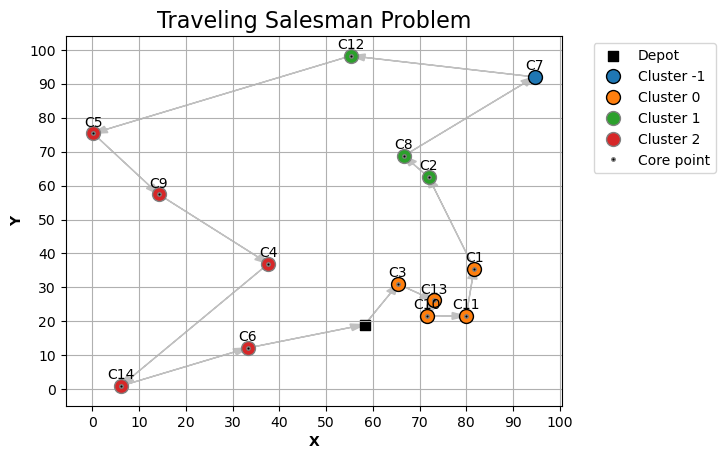

,X,Y,Depot Distance,X Mean,Y Mean,X Std,Y Std,X Max,Y Max,X Min,Y Min,Correlation,Skewness X,Skewness Y,Savings,Marginal Costs,Total Costs,Shapley Value
1,81.667559,35.528101,28.625062,53.681887,45.743225,29.087803,29.029974,94.627793,98.225087,0.171087,0.953598,0.134238,-0.590515,0.350237,1.027140,7.326131,380.061859,12.902253
2,71.932706,62.487468,45.545578,53.681887,45.743225,29.087803,29.029974,94.627793,98.225087,0.171087,0.953598,0.134238,-0.590515,0.350237,0.405921,0.405921,380.061859,16.281936
3,65.384259,30.995069,13.912689,53.681887,45.743225,29.087803,29.029974,94.627793,98.225087,0.171087,0.953598,0.134238,-0.590515,0.350237,6.529122,9.436161,380.061859,8.342868
4,37.673664,37.006325,27.329702,53.681887,45.743225,29.087803,29.029974,94.627793,98.225087,0.171087,0.953598,0.134238,-0.590515,0.350237,21.978089,21.978089,380.061859,17.844500
5,0.171087,75.397480,80.940768,53.681887,45.743225,29.087803,29.029974,94.627793,98.225087,0.171087,0.953598,0.134238,-0.590515,0.350237,24.550334,24.550334,380.061859,58.336451
6,33.254116,12.161266,25.942484,53.681887,45.743225,29.087803,29.029974,94.627793,98.225087,0.171087,0.953598,0.134238,-0.590515,0.350237,0.104561,2.039896,380.061859,16.340385
7,94.627793,92.010319,81.527237,53.681887,45.743225,29.087803,29.029974,94.627793,98.225087,0.171087,0.953598,0.134238,-0.590515,0.350237,44.657493,44.657493,380.061859,67.776703
8,66.612956,68.752938,50.408397,53.681887,45.743225,29.087803,29.029974,94.627793,98.225087,0.171087,0.953598,0.134238,-0.590515,0.350237,7.391947,7.391947,380.061859,20.350193
9,14.197038,57.438052,58.452151,53.681887,45.743225,29.087803,29.029974,94.627793,98.225087,0.171087,0.953598,0.134238,-0.590515,0.350237,0.241269,0.522776,380.061859,28.163866
10,71.590383,21.687833,13.582948,53.681887,45.743225,29.087803,29.029974,94.627793,98.225087,0.171087,0.953598,0.134238,-0.590515,0.350237,4.802001,4.802001,380.061859,6.417000


RECOMPUTED STATISTICS:
X mean: 53.68188714324528
Y mean: 45.74322477828791
X std: 29.087803438425347
Y std: 29.029974007957385
X max: 94.62779326294437
Y max: 98.22508732331865
X min: 0.1710871715958739
Y min: 0.9535979260038796
X skew: -0.5905148826238982
Y skew: 0.3502365229607694
X and Y coordinates correlation: 0.13423790061485796


In [99]:
# Get column names
statistical_features = ['X Mean', 'Y Mean', 'X Std', 'Y Std', 'X Max', 'Y Max', 'X Min', 'Y Min', 'Correlation', 'Skewness X', 'Skewness Y']
cost_features = ['Savings', 'Marginal Costs', 'Total Costs', 'Shapley Value']

# View instance with optimal tour and display the data frame
plot_tsp(coord=coord, sequence=sequence, total_costs=total_costs, x_range=x_range, y_range=y_range, 
         assignments=assignments, core_point_indices=core_point_indices, plot_sequence=True, print_sequence=True)
display(tsp_instance[['X', 'Y', 'Depot Distance'] + statistical_features + cost_features])

# Recompute statistics
print('RECOMPUTED STATISTICS:')
statistics = [np.mean, np.std, np.max, np.min, skew]
for statistic in statistics:
    for column in ['X', 'Y']:
        print('{} {}: {}'.format(column, str(statistic.__name__), statistic((tsp_instance[column]))))

print('X and Y coordinates correlation:', np.corrcoef(tsp_instance['X'], tsp_instance['Y'])[0, 1])

**Ratio features**

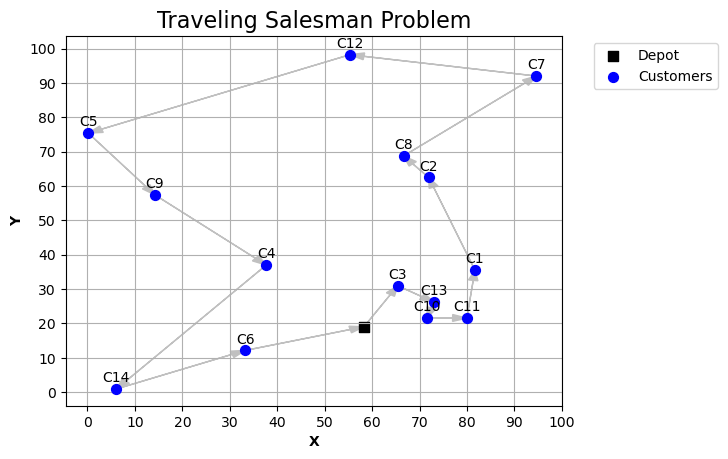

,X,Y,Depot Distance,Closest Customer Distance (CCD),2nd CCD,3rd CCD,4th CCD,Mean Distance To Other Customers,Gravity Center Distance,Centroid Distance,Centroid Distance To Depot,Distance To Closest Other Cluster,Distance To Closest Other Centroid,Cluster Area,Cluster Density,Savings,Marginal Costs
1,81.667559,35.528101,28.625062,12.692656,14.070423,16.902492,17.120237,45.724826,29.791720,11.101611,18.015990,28.663127,44.368158,208.245075,0.024010,1.027140,7.326131
2,71.932706,62.487468,45.545578,8.219237,28.663127,32.166027,36.304716,45.512272,24.768166,15.797885,57.798001,28.663127,35.374466,1003.092832,0.002991,0.405921,0.405921
3,65.384259,30.995069,13.912689,9.050037,11.186627,16.902492,17.364379,40.665217,18.826938,9.722258,18.015990,28.355110,45.499926,208.245075,0.024010,6.529122,9.436161
4,37.673664,37.006325,27.329702,25.235082,28.355110,31.122459,36.999257,44.468419,18.237232,19.396461,43.668703,28.355110,37.949584,4352.591524,0.001149,21.978089,21.978089
5,0.171087,75.397480,80.940768,22.787460,53.668651,59.668461,66.773287,73.918537,61.178269,42.824157,43.668703,59.668461,64.453454,4352.591524,0.001149,24.550334,24.550334
6,33.254116,12.161266,25.942484,25.235082,29.364767,37.243231,39.502213,54.935799,39.307020,28.653162,43.668703,37.243231,43.743173,4352.591524,0.001149,0.104561,2.039896
7,94.627793,92.010319,81.527237,36.410670,37.237961,39.815553,57.950053,72.663057,61.783584,0.000000,81.527237,36.410670,33.788700,1.000000,1.000000,44.657493,44.657493
8,66.612956,68.752938,50.408397,8.219237,31.568730,36.410670,36.476443,46.905880,26.394306,7.989336,57.798001,36.476443,42.269366,1003.092832,0.002991,7.391947,7.391947
9,14.197038,57.438052,58.452151,22.787460,31.122459,49.123921,53.623270,58.065217,41.180363,21.243099,43.668703,53.623270,53.897322,4352.591524,0.001149,0.241269,0.522776
10,71.590383,21.687833,13.582948,4.745617,8.373132,11.186627,17.120237,44.937265,29.989600,6.151831,18.015990,37.215588,55.242778,208.245075,0.024010,4.802001,4.802001


,X,Y,Depot Distance Ratio,Closest Customer Distance (CCD) Ratio,2nd CCD Ratio,3rd CCD Ratio,4th CCD Ratio,Mean Distance To Other Customers Ratio,Gravity Center Distance Ratio,Centroid Distance Ratio,Centroid Distance To Depot Ratio,Distance To Closest Other Cluster Ratio,Distance To Closest Other Centroid Ratio,Cluster Area Ratio,Cluster Density Ratio,Savings Ratio,Marginal Costs Ratio
1,81.667559,35.528101,0.669051,0.712560,0.521630,0.525227,0.449142,0.839964,0.783203,0.664864,0.447726,0.695416,0.875358,0.112938,0.296222,0.082057,0.542471
2,71.932706,62.487468,1.064532,0.461425,1.062623,0.999526,0.952438,0.836060,0.651138,0.946119,1.436371,0.695416,0.697918,0.544009,0.036898,0.032429,0.030057
3,65.384259,30.995069,0.325180,0.508065,0.414720,0.525227,0.455547,0.747019,0.494947,0.582256,0.447726,0.687943,0.897687,0.112938,0.296222,0.521605,0.698710
4,37.673664,37.006325,0.638774,1.416687,1.051204,0.967098,0.970659,0.816884,0.479444,1.161634,1.085236,0.687943,0.748724,2.360548,0.014172,1.755807,1.627391
5,0.171087,75.397480,1.891820,1.279279,1.989649,1.854135,1.751768,1.357882,1.608334,2.564695,1.085236,1.447658,1.271630,2.360548,0.014172,1.961301,1.817855
6,33.254116,12.161266,0.606351,1.416687,1.088635,1.157295,1.036323,1.009170,1.033354,1.716008,1.085236,0.903584,0.863028,2.360548,0.014172,0.008353,0.151046
7,94.627793,92.010319,1.905527,2.044080,1.380516,1.237227,1.520294,1.334819,1.624247,0.000000,2.026080,0.883385,0.666632,0.000542,12.337336,3.567642,3.306711
8,66.612956,68.752938,1.178190,0.461425,1.170342,1.131424,0.956944,0.861660,0.693888,0.478473,1.436371,0.884980,0.833950,0.544009,0.036898,0.590535,0.547344
9,14.197038,57.438052,1.366196,1.279279,1.153798,1.526475,1.406783,1.066657,1.082603,1.272227,1.085236,1.300992,1.063363,2.360548,0.014172,0.019275,0.038710
10,71.590383,21.687833,0.317473,0.266417,0.310416,0.347613,0.449142,0.825497,0.788406,0.368427,0.447726,0.902913,1.089908,0.112938,0.296222,0.383627,0.355569


In [100]:
# Get column names
ratio_features = ['Depot Distance', 'Closest Customer Distance (CCD)', '2nd CCD', '3rd CCD', '4th CCD', 'Mean Distance To Other Customers', 
                  'Gravity Center Distance', 'Centroid Distance', 'Centroid Distance To Depot', 'Distance To Closest Other Cluster', 
                  'Distance To Closest Other Centroid', 'Cluster Area', 'Cluster Density', 'Savings', 'Marginal Costs']

# View instance with optimal tour and display the data frame
plot_tsp(coord=coord, sequence=sequence, total_costs=total_costs, x_range=x_range, y_range=y_range, 
         assignments=None, core_point_indices=None, plot_sequence=True)
display(tsp_instance[['X', 'Y'] + ratio_features])
display(tsp_instance[['X', 'Y'] + [i + ' Ratio' for i in ratio_features]])

In [103]:
feature = 'Depot Distance'
mean = np.mean(tsp_instance[feature])
ratio = np.array(tsp_instance[feature] / mean)
for i in range(num_customers): print('Customer {}: {} / {} = {}'.format(i+1, tsp_instance.iloc[i][feature], mean, ratio[i]))

Customer 1: 28.62506233167605 / 42.78460614496577 = 0.6690505046297874
Customer 2: 45.54557785890905 / 42.78460614496577 = 1.0645318950603018
Customer 3: 13.91268867375992 / 42.78460614496577 = 0.32517977673137816
Customer 4: 27.32970196831364 / 42.78460614496577 = 0.638774186110613
Customer 5: 80.9407675700441 / 42.78460614496577 = 1.8918198591286544
Customer 6: 25.94248388735545 / 42.78460614496577 = 0.6063508870329513
Customer 7: 81.52723650982642 / 42.78460614496577 = 1.9055273346116635
Customer 8: 50.40839676662175 / 42.78460614496577 = 1.1781900386280177
Customer 9: 58.45215115014573 / 42.78460614496577 = 1.3661958451152758
Customer 10: 13.58294808056397 / 42.78460614496577 = 0.31747278529434825
Customer 11: 21.84057652058184 / 42.78460614496577 = 0.5104774471121712
Customer 12: 79.2406009390432 / 42.78460614496577 = 1.852082047233407
Customer 13: 16.43360344255466 / 42.78460614496577 = 0.38410084661930005
Customer 14: 55.20269033012492 / 42.78460614496577 = 1.290246546692129
